# RETO: *Ingeniería de características*

+ El objetivo de este reto es extraer o diseñar un mejor par de características para construir un clasificador linear mediante regresión logística.
+ Ejecuta todo el cuaderno y después lee las instrucciones del reto, abajo del todo.
---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [1]:
# PONED VUESTROS NOMBRES EN ESTA LISTA 
nombres = ['Natalia Sacristan'] 

In [2]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#-------------------------------#
# Extracción de características #
#-------------------------------#
def feat_extraction (data, theta=0.1):
    # data: dataframe
    # theta: parameter of the feature extraction
    # features extracted: 
    #   'width','W_max1','W_max2','W_max3',
    #   'height','H_max1','H_max2','H_max3',
    #   'area','w_vs_h'
    #
    features = np.zeros([data.shape[0], 11]) #<- allocate memory with zeros
    data = data.values.reshape([data.shape[0],28,28]) 
    #-> axis 0: id of instance, axis 1: width(cols) , axis 2: height(rows)
    for k in range(data.shape[0]):
        
        #..current image 
        x = data[k,:,:]
        
        #--width feature
        sum_cols = x.sum(axis=0) #<- axis0 of x, not of data!!
        indc = np.argwhere(sum_cols > theta * sum_cols.max())
        col_3maxs = np.argsort(sum_cols)[-3:] 
        features[k,0] = indc[-1] - indc[0]
        features[k,1:4] = col_3maxs
        
        #--height feature
        sum_rows = x.sum(axis=1) #<- axis1 of x, not of data!!
        indr = np.argwhere(sum_rows > theta * sum_rows.max())
        features[k,4] = indr[-1] - indr[0]
        row_3maxs = np.argsort(sum_rows)[-3:] 
        features[k,5:8] = row_3maxs
        
        #--breadth feature 
        index_row = round (0.5 * x.shape[0])
        row = x[index_row,:] 
        index_values = np.argwhere(row > theta * row.max()) 
        breadth= index_values[-1] - index_values[0]
        features[k,8] = breadth; 
        

    
    #--area
    features[:,9] = features[:,0] * features[:,4] #Multiplica anchura por altura en todas las k (imagenes)
    
    #--ratio W/H    
    features[:,10] = features[:,0] / features[:,4]
    
    col_names = ['width','W_max1','W_max2','W_max3','height','H_max1','H_max2','H_max3', 'breadth', 'area', 'w_vs_h']

    return pd.DataFrame(features,columns = col_names) 

In [4]:
#---------------------#
# Separacion de datos #
#---------------------#
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    train_set = data.iloc[train_indices]
    test_set  = data.iloc[test_indices]
    return train_set.reset_index(drop=True), test_set.reset_index(drop=True)

In [5]:
#------------------------------#
# Algunas funciones auxiliares #
#------------------------------#

def join_features_labels(X0,X1):
    Y0 = pd.DataFrame(np.zeros(X0.shape[0]),columns=['label'])
    XY0 = pd.concat([X0,Y0],axis=1)
    Y1 = pd.DataFrame(np.ones(X1.shape[0]),columns=['label'])
    XY1 = pd.concat([X1,Y1],axis=1)
    return pd.concat([XY0,XY1],axis=0,ignore_index=True)

def jitter(X,sigma=0.2):
    random_sign = (-1)**np.random.randint(1,3,*X.shape)
    return X + np.random.normal(0,sigma,*X.shape)*random_sign

In [6]:
#------------------------------#
# Construcción de los datasets #
#------------------------------#
np.random.seed(seed=1234) #<- comment this to get randomness
fraction_Test  = 0.2
fraction_Valid = 0.2
theta = 0.5

# --- Get data -------------------------------------
FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)
FullSet_0 = FullSet_0 /255. #<- quick rescale to [0,1]
FullSet_1 = FullSet_1 /255. #<- quick rescale to [0,1]

# --- Separate Test sets -----------------------------
TrainSet_0, TestSet_0 = split_train_test(FullSet_0, fraction_Test)
TrainSet_1, TestSet_1 = split_train_test(FullSet_1, fraction_Test)

# --- Separate Validation sets -----------------------
TrainSet_0, ValidSet_0 = split_train_test(TrainSet_0, fraction_Valid)
TrainSet_1, ValidSet_1 = split_train_test(TrainSet_1, fraction_Valid)

# --- Ensamble TRAIN SET, VALIDATION SET Y TEST SET --
#          with the features and the labels
Feat_train = join_features_labels(feat_extraction(TrainSet_0, theta=theta), 
                                  feat_extraction(TrainSet_1, theta=theta))
Feat_valid = join_features_labels(feat_extraction(ValidSet_0, theta=theta),
                                  feat_extraction(ValidSet_1, theta=theta))
Feat_test  = join_features_labels(feat_extraction(TestSet_0,  theta=theta),
                                  feat_extraction(TestSet_1,  theta=theta))

['Natalia Sacristan'] 

Outcome:
  :) HIT  = 319, (99.69%)
  :( FAIL = 1, (0.31%)

Logistic regression model:
  clf coef. =  [[-0.78345364 -0.78345364]]
  clf intercept =  [11.46139358]


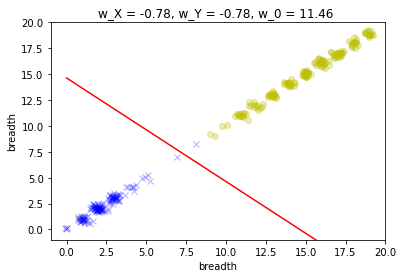

In [7]:
#----------------------------#
# Entrenamiento y evaluación #
#----------------------------#

#-[1].Select any 2 features from the list:
#    -features list: 'width','W_max1','W_max2','W_max3','height','H_max1','H_max2','H_max3','area','w_vs_h'
feat_1 = 'breadth'
feat_2 = 'breadth'

#-[2].Fit a LogisticRegression model (a linear classifier) with Feat_train dataframe
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Feat_train[[feat_1, feat_2]], Feat_train['label'])

#-[3].Predict the Feat_valid dataframe
y_pred = clf.predict( Feat_valid[[feat_1, feat_2]] )

#-[4].Compare the predictions with the ground truth
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_pred, Feat_valid['label'])
N_success = conf_mat[0,0]+conf_mat[1,1]
N_fails = conf_mat[0,1]+conf_mat[1,0]
print (nombres,"\n")
print("Outcome:")
strlog = "  :) HIT  = %d, (%0.2f%%)"%(N_success, 100*N_success/(N_success+N_fails))
print(strlog)
strlog = "  :( FAIL = %d, (%0.2f%%)"%(N_fails, 100*N_fails/(N_success+N_fails))
print(strlog)

#-[5].Show the (linear) model parameters
print("\nLogistic regression model:")
print("  clf coef. = ",clf.coef_)
print("  clf intercept = ",clf.intercept_)

#-[6].Plot Feat_valid and the model
ind = Feat_valid['label']==0
x0, x1 = Feat_valid[ind][feat_1], Feat_valid[~ind][feat_1]
y0, y1 = Feat_valid[ind][feat_2], Feat_valid[~ind][feat_2]
plt.plot(jitter(x0),jitter(y0),'yo',jitter(x1),jitter(y1),'bx', alpha=.3)

w = clf.coef_[0]
a = -w[0] / w[1]
xmin=min(x0.min(axis=0),x1.min(axis=0))
xmax=max(x0.max(axis=0),x1.max(axis=0))
ymin=min(y0.min(axis=0),y1.min(axis=0))
ymax=max(y0.max(axis=0),y1.max(axis=0))
xx = np.linspace(xmin,xmax)
yy = a * xx - (clf.intercept_[0] / w[1])
plt.plot(xx,yy,'r')
strTitle = "w_X = %2.2f, w_Y = %2.2f, w_0 = %2.2f " % (w[0], w[1], clf.intercept_[0])
plt.axis([xmin-1,xmax+1,ymin-1,ymax+1])
plt.title(strTitle)
plt.xlabel(feat_1)
plt.ylabel(feat_2)
plt.show()

Este reto consiste en extraer o diseñar dos características que mejor separen linealmente los ceros de los unos. 
Para ello:
+ Podeis modificar la funcion **feat_extraction** y el parámetro **theta**
+ NO podeis modificar el método de aprendizaje
+ NO podeis utilizar más de dos características para aprender el modelo.
+ NO podeis modificar la semilla de números pseudoaleatorios (seed=1234)

Una vez lo hayais hecho, debeis ejecutar todo el cuaderno (*Kernel $\rightarrow$ Restart & Run all* ) para obtener el resultado en la celda de arriba.

Por último, teneis que:
1. Descargar el cuaderno ( *File* $\rightarrow$ *Download as* $\rightarrow$ *Notebook* )<br>
Hacer esto con el cuaderno **tal y como haya quedado al terminar la ejecución**
2. Subirlo al aula virtual, en la pestaña *Evaluación*, en la tarea *Reto 1: Ingeniería de características*